In [1]:
# Importing the libraries
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Importing the functions and classes
from magnetic_dataset import DiffusionDataset, data_transform
from diffusion_model_sampler import forward_diffusion_sample, show_tensor_image
from diffusion_model import SimpleUnet
from diffusion_model_train import train_diffusion_model
from diffusion_parameters import *


torch.Size([64])
tensor(150)


In [2]:
# Initializing variables
structure_dir = r"C:\Users\20202137\OneDrive - TU Eindhoven\Jaar 4\BEP\Programming\MachineLearning\MachineLearningModels\data\figure_B\Structure"
magnetic_dir = r"C:\Users\20202137\OneDrive - TU Eindhoven\Jaar 4\BEP\Programming\MachineLearning\MachineLearningModels\data\figure_B\Output"

In [3]:
# Creating the dataset
magnetic_dataset = DiffusionDataset(input_dir=magnetic_dir, transform=data_transform)
magnetic_dataloader = DataLoader(magnetic_dataset, batch_size=BATCH_SIZE, shuffle=True)


Tensor image shape: torch.Size([3, 64, 64])


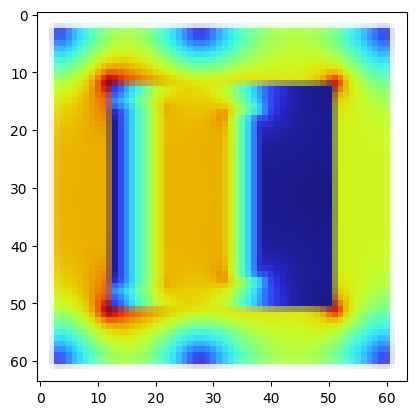

In [4]:
show_tensor_image(magnetic_dataset[0])

Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])


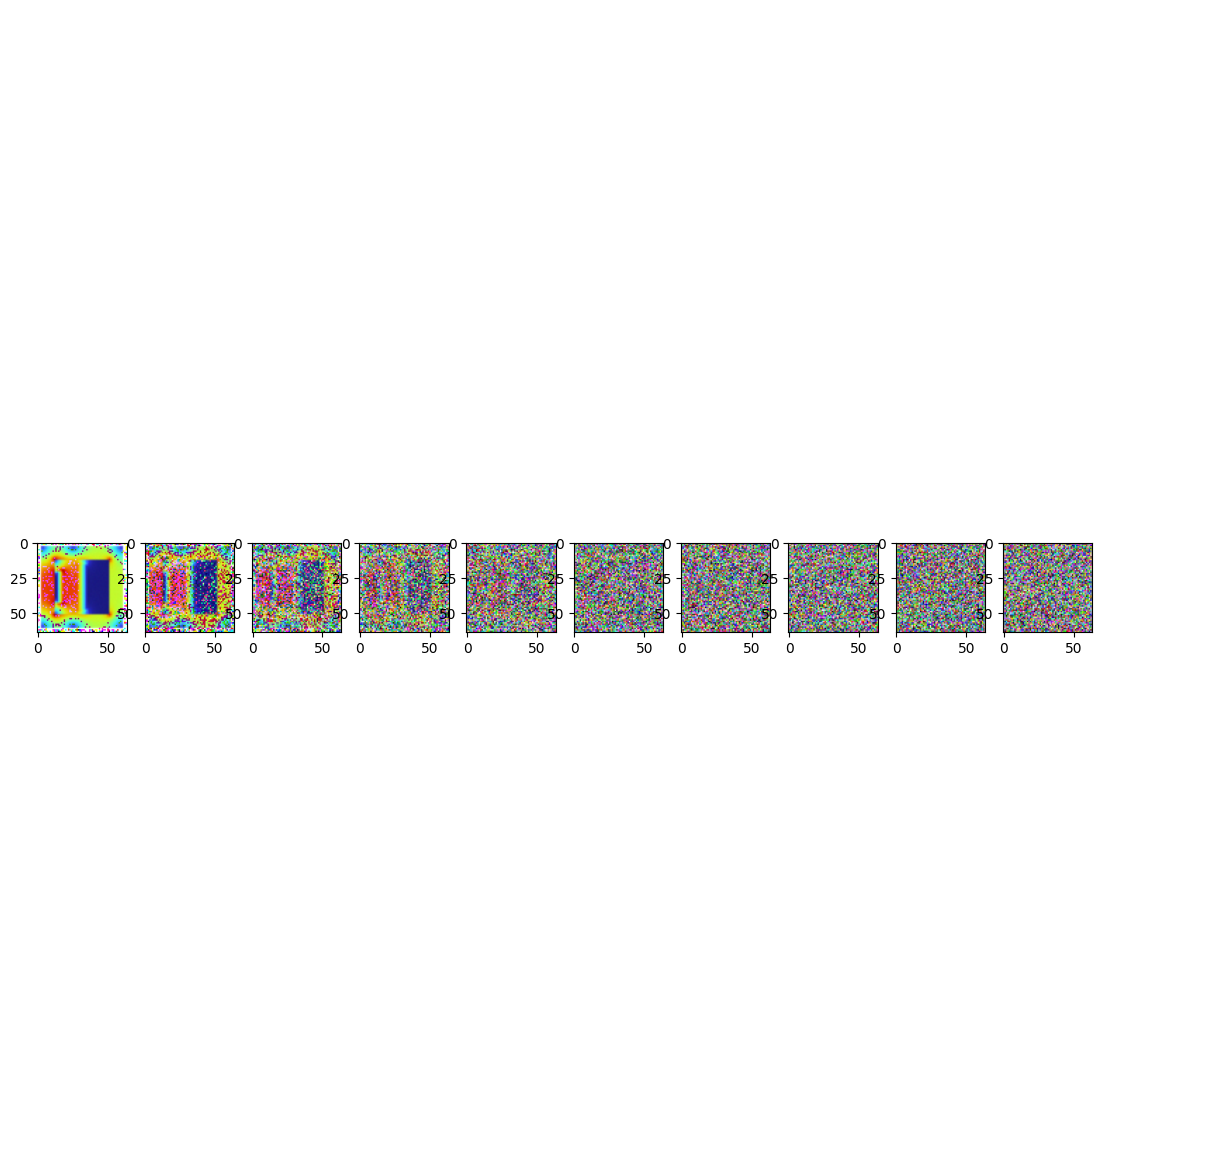

In [5]:
# Simulate forward diffusion
image = next(iter(magnetic_dataloader))[0]

plt.figure(figsize=(15,15))
plt.axis('off')
num_images = 10
stepsize = int(T/num_images)

for idx in range(0, T, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    img, noise = forward_diffusion_sample(image, t)
    show_tensor_image(img)

In [6]:
# Creating the model
model = SimpleUnet()
print("Num params: ", sum(p.numel() for p in model.parameters()))
model

Num params:  62438883


SimpleUnet(
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): ReLU()
  )
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downs): ModuleList(
    (0): Block(
      (time_mlp): Linear(in_features=32, out_features=128, bias=True)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transform): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (time_mlp): Linear(in_features=32, out_features=256, bias=True)
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transfor

Training on cuda
Epoch 1
-------------------------------
X shape: torch.Size([64, 3, 64, 64])
Batch: 0
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
Epoch 0 | step 000 Loss: 0.8079544901847839 
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])
Tensor image shape: torch.Size([3, 64, 64])


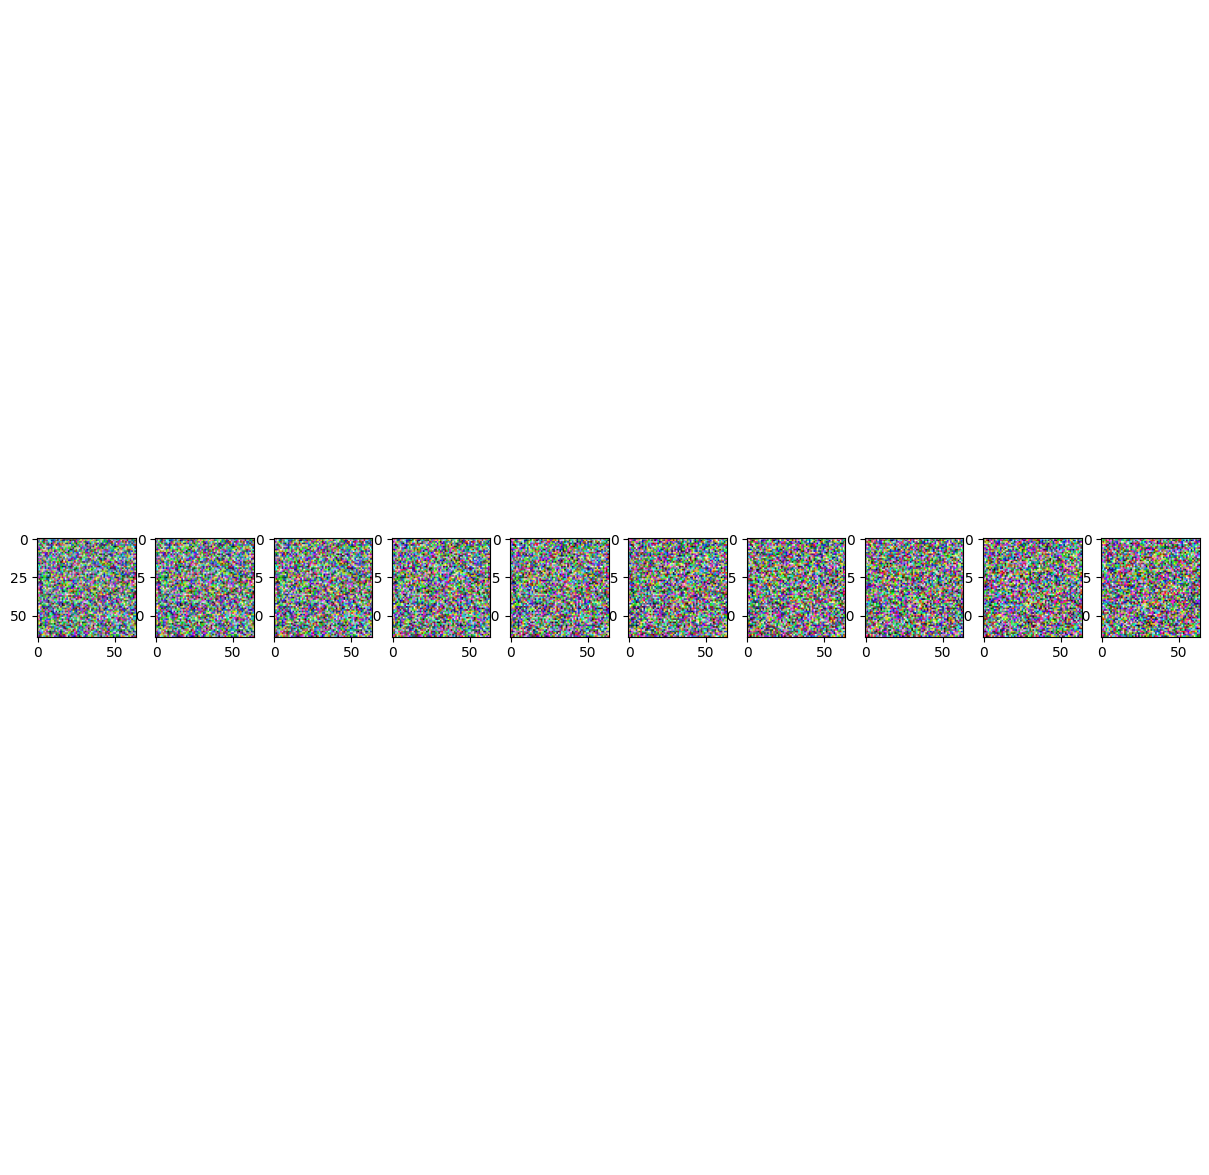

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

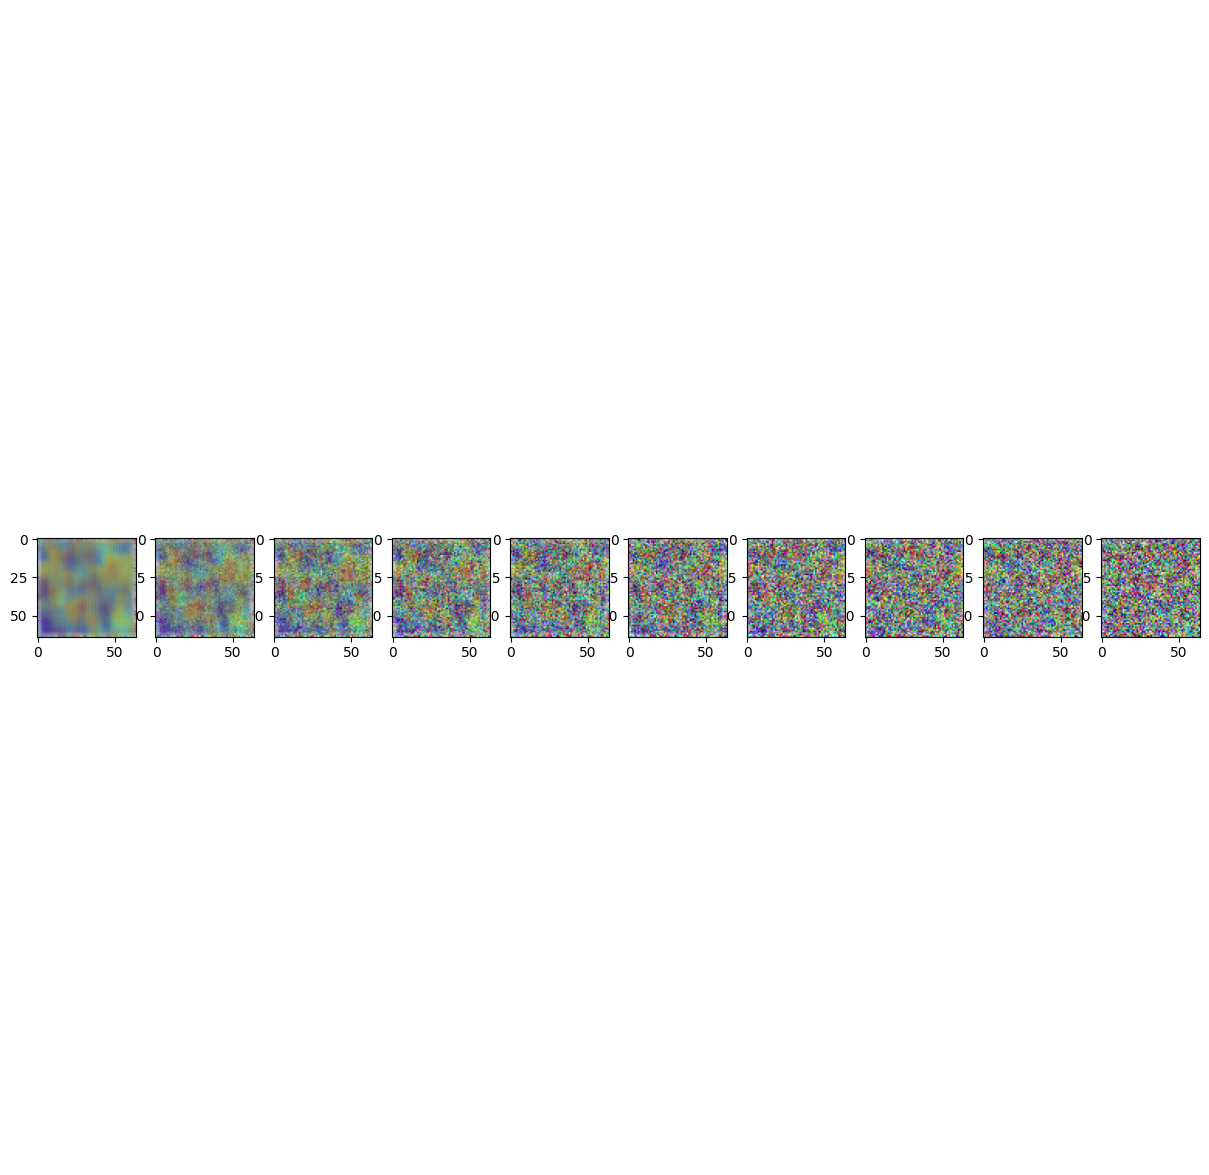

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

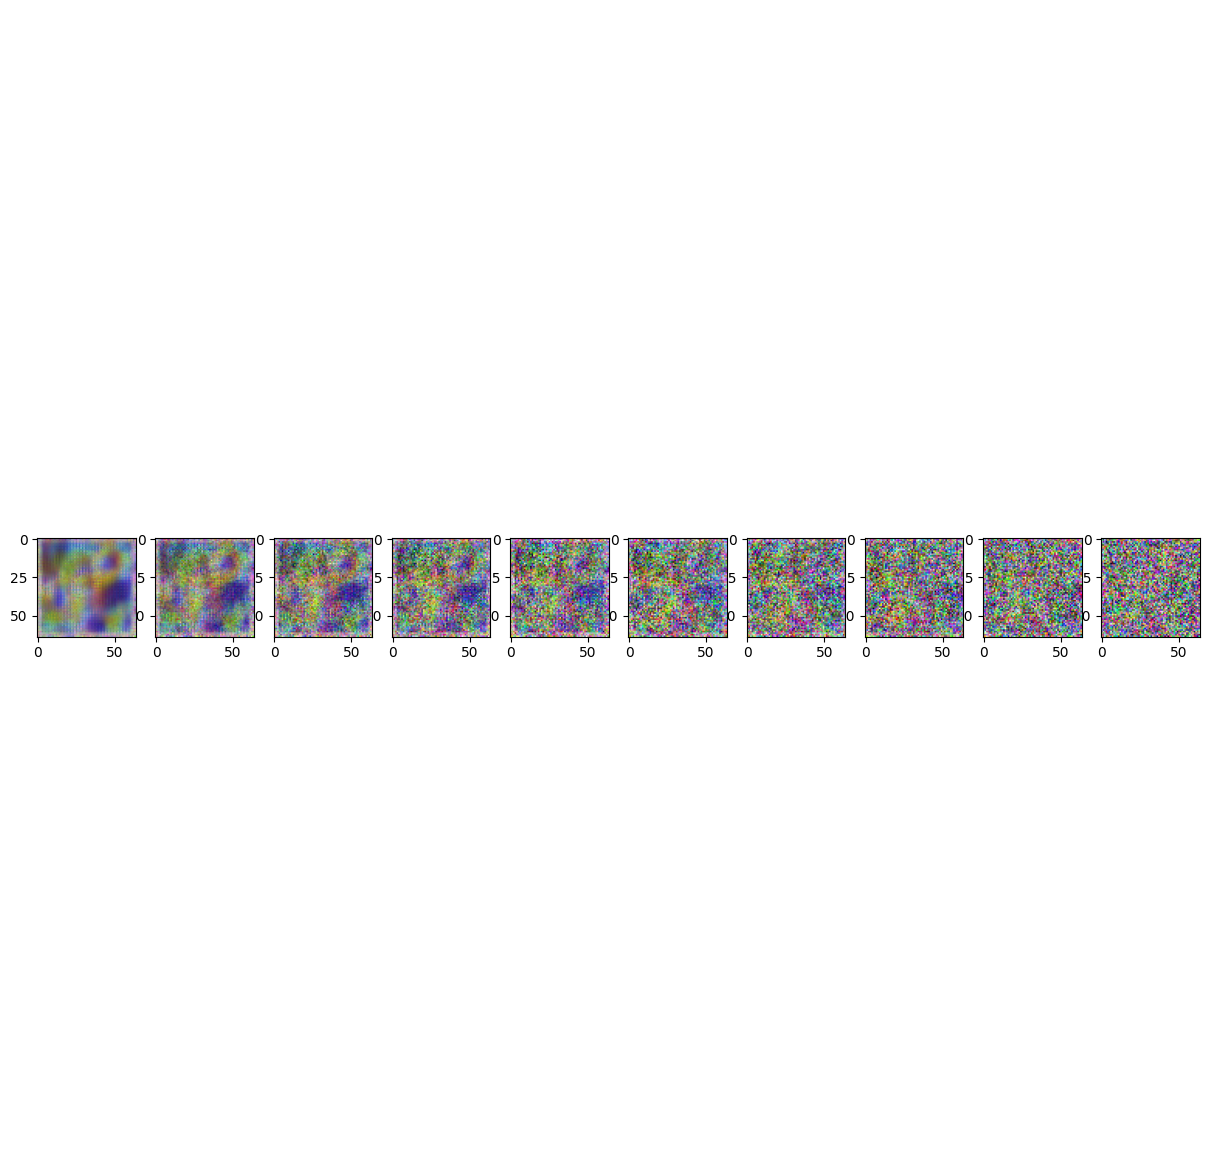

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

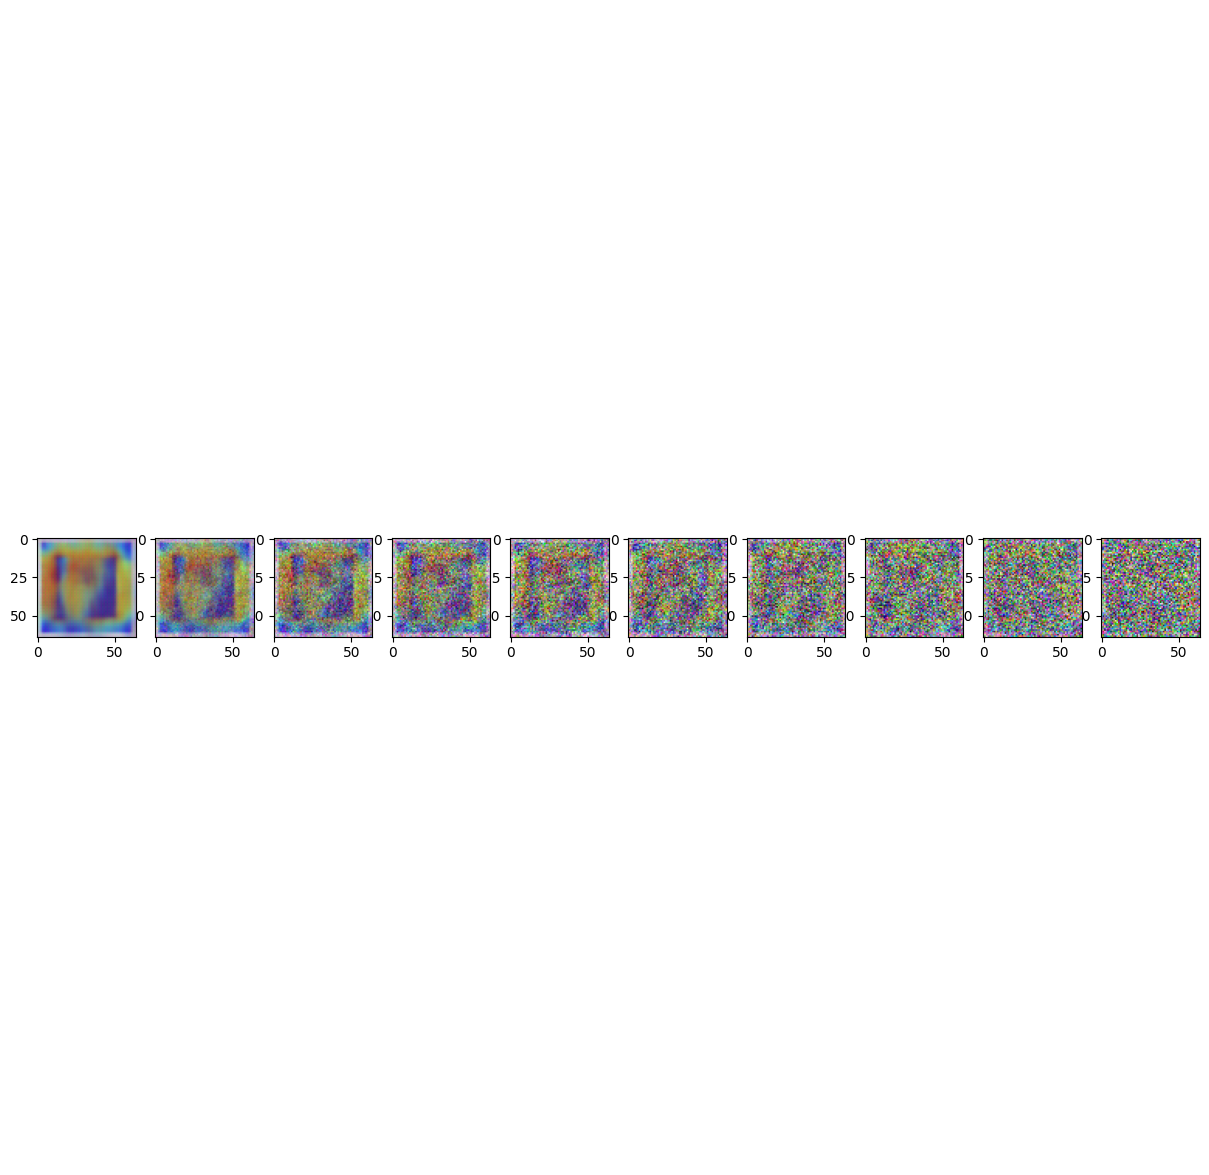

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

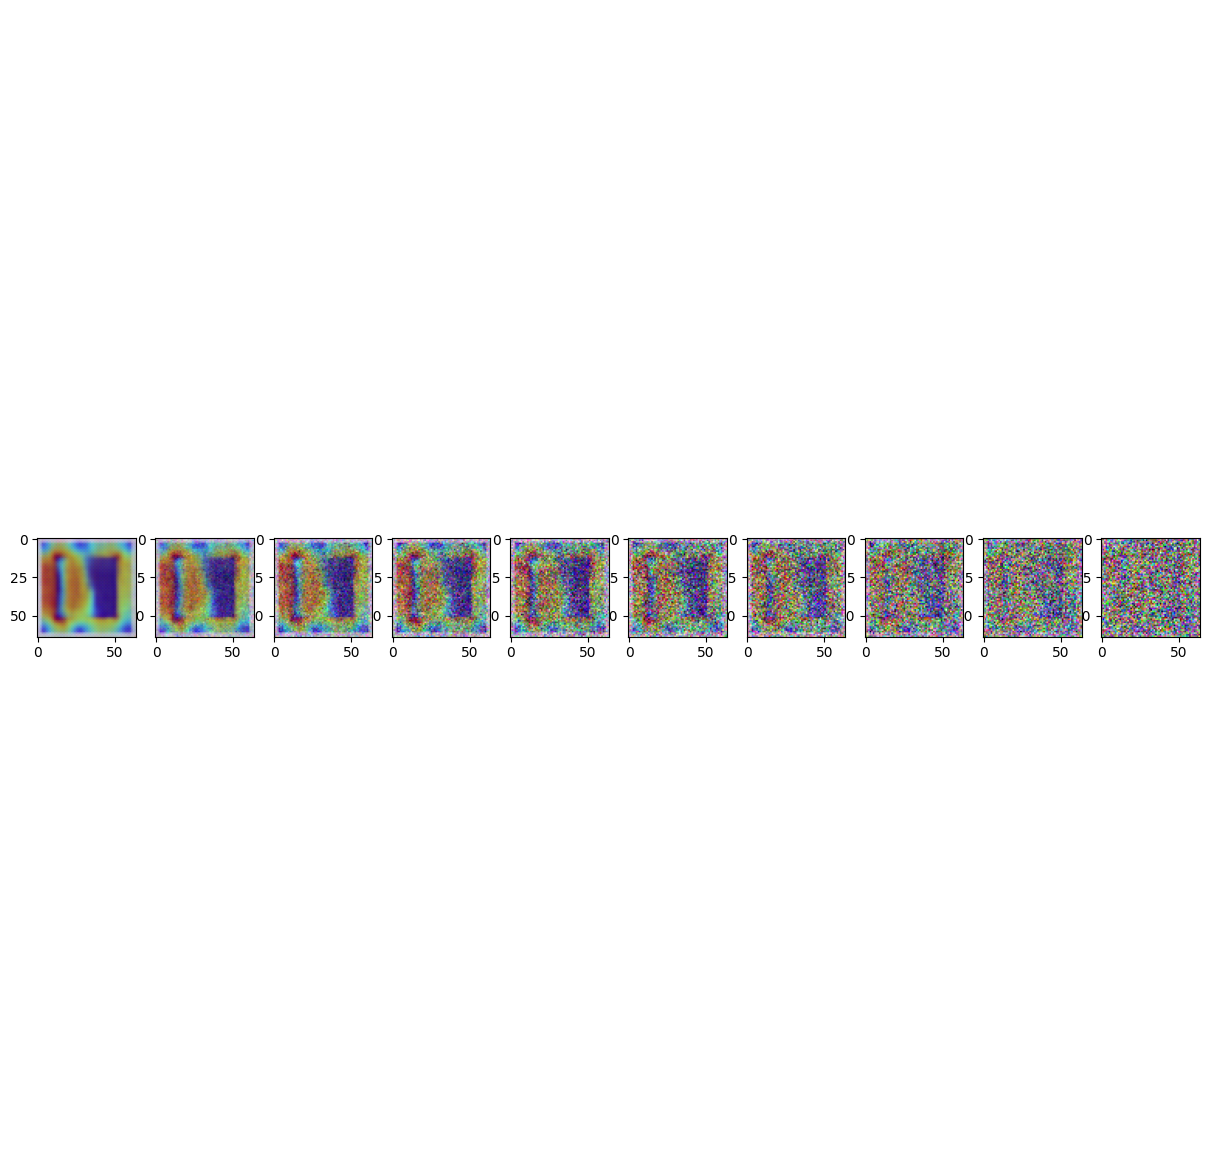

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

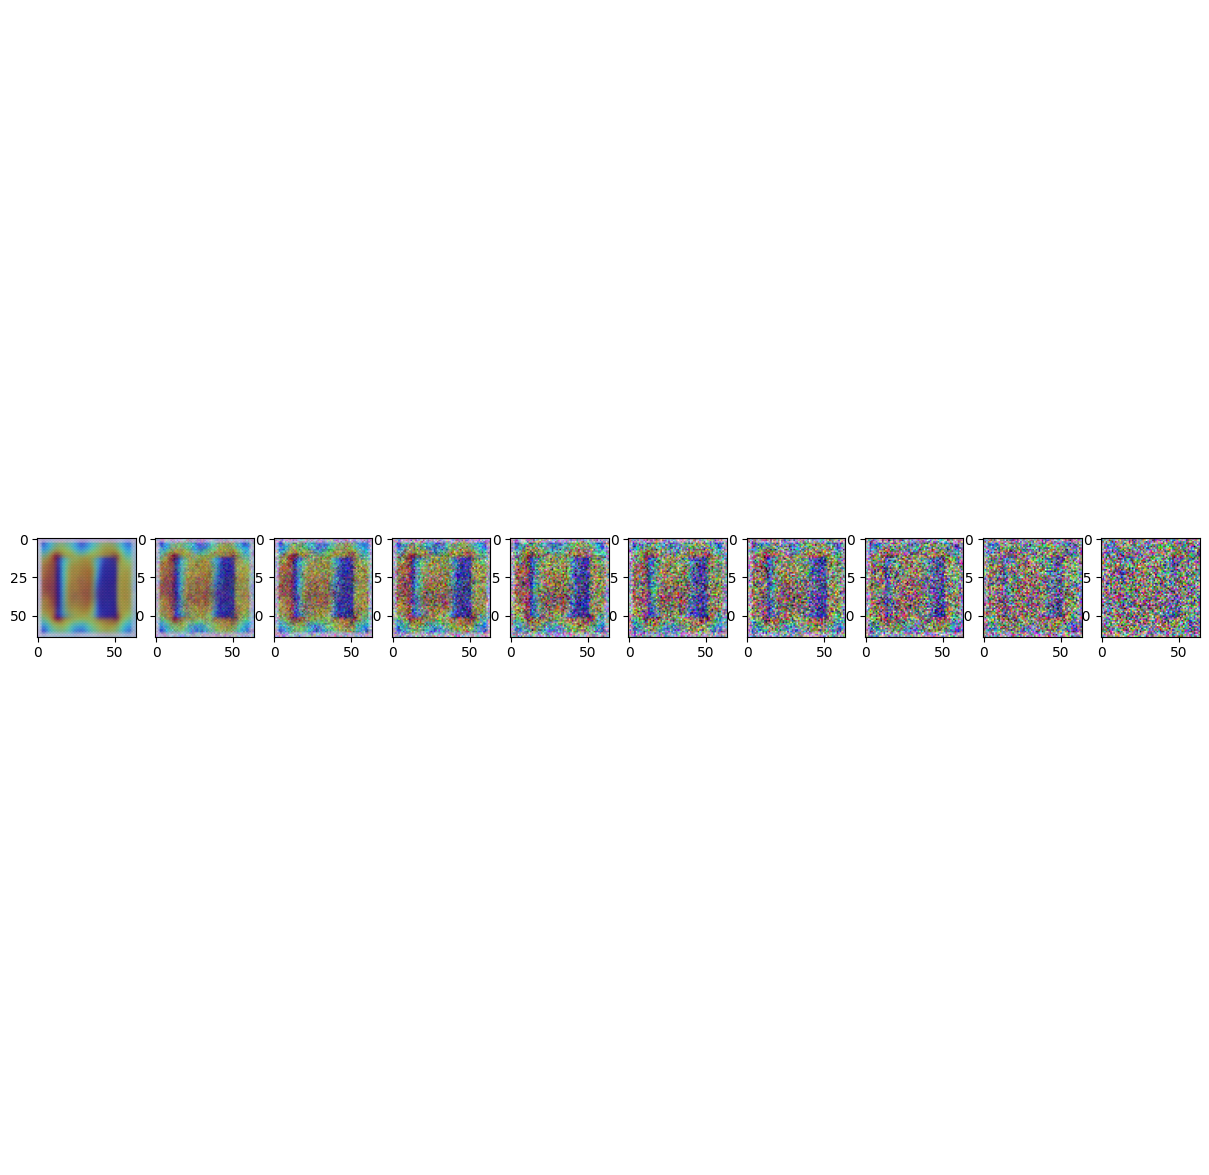

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

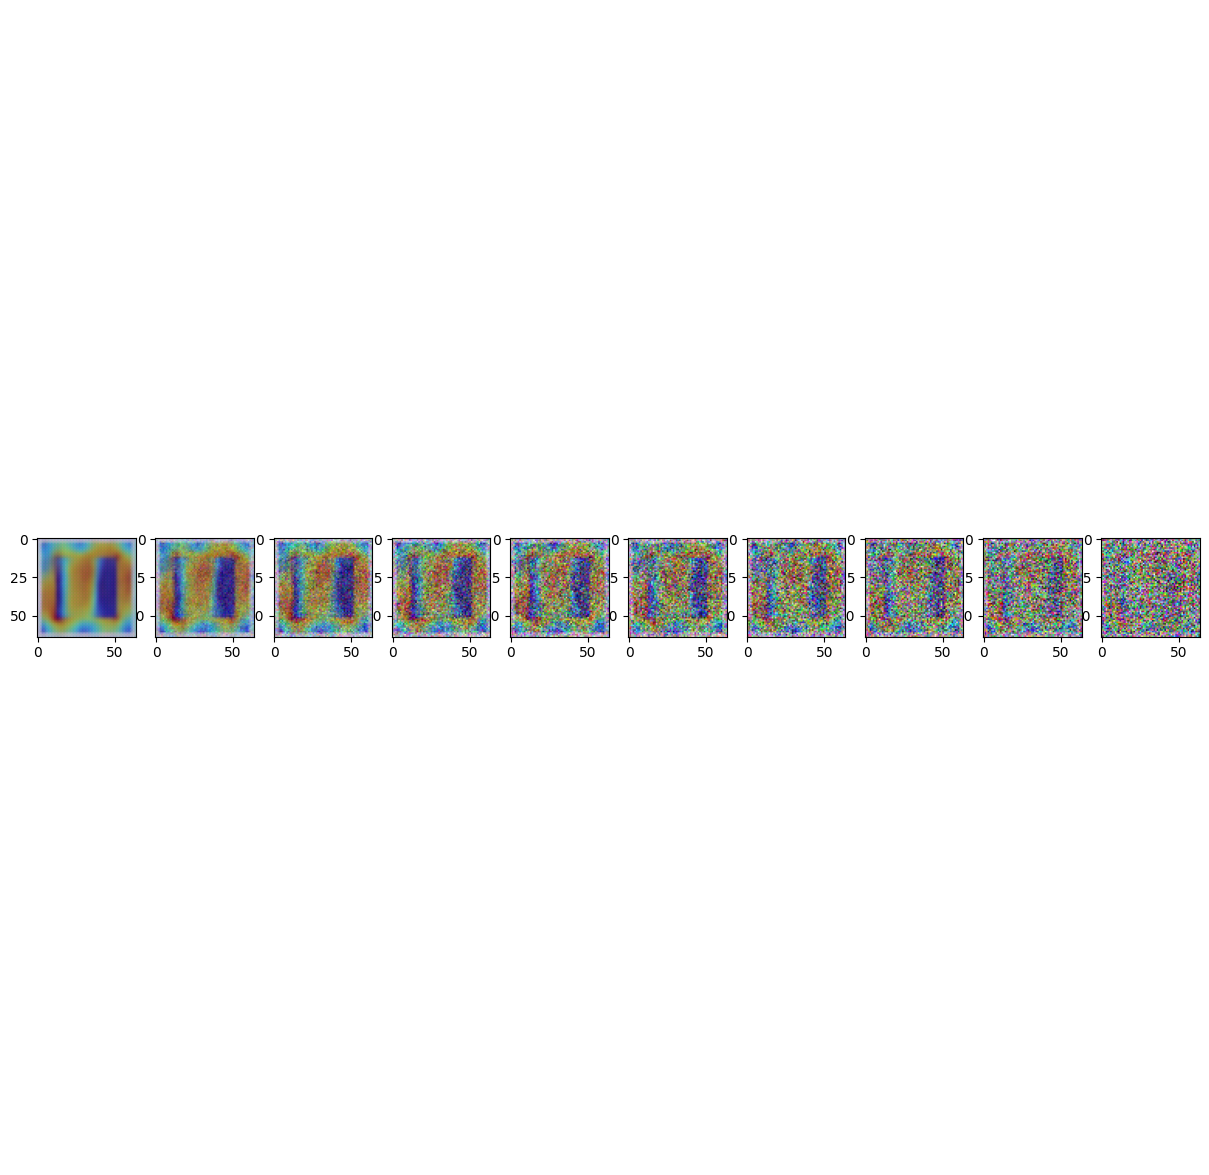

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

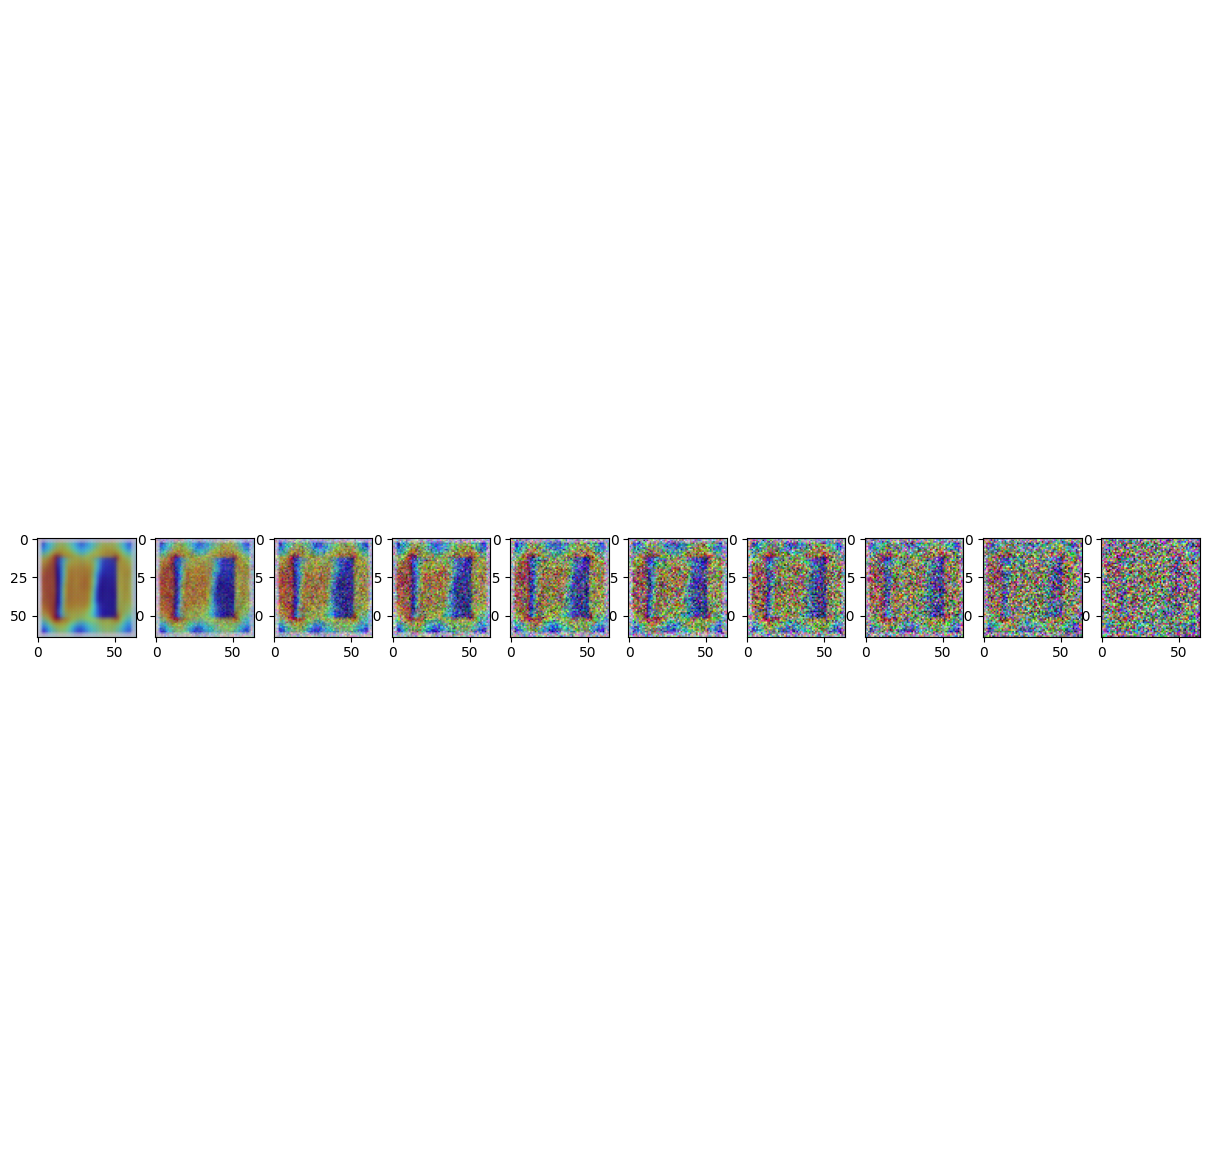

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

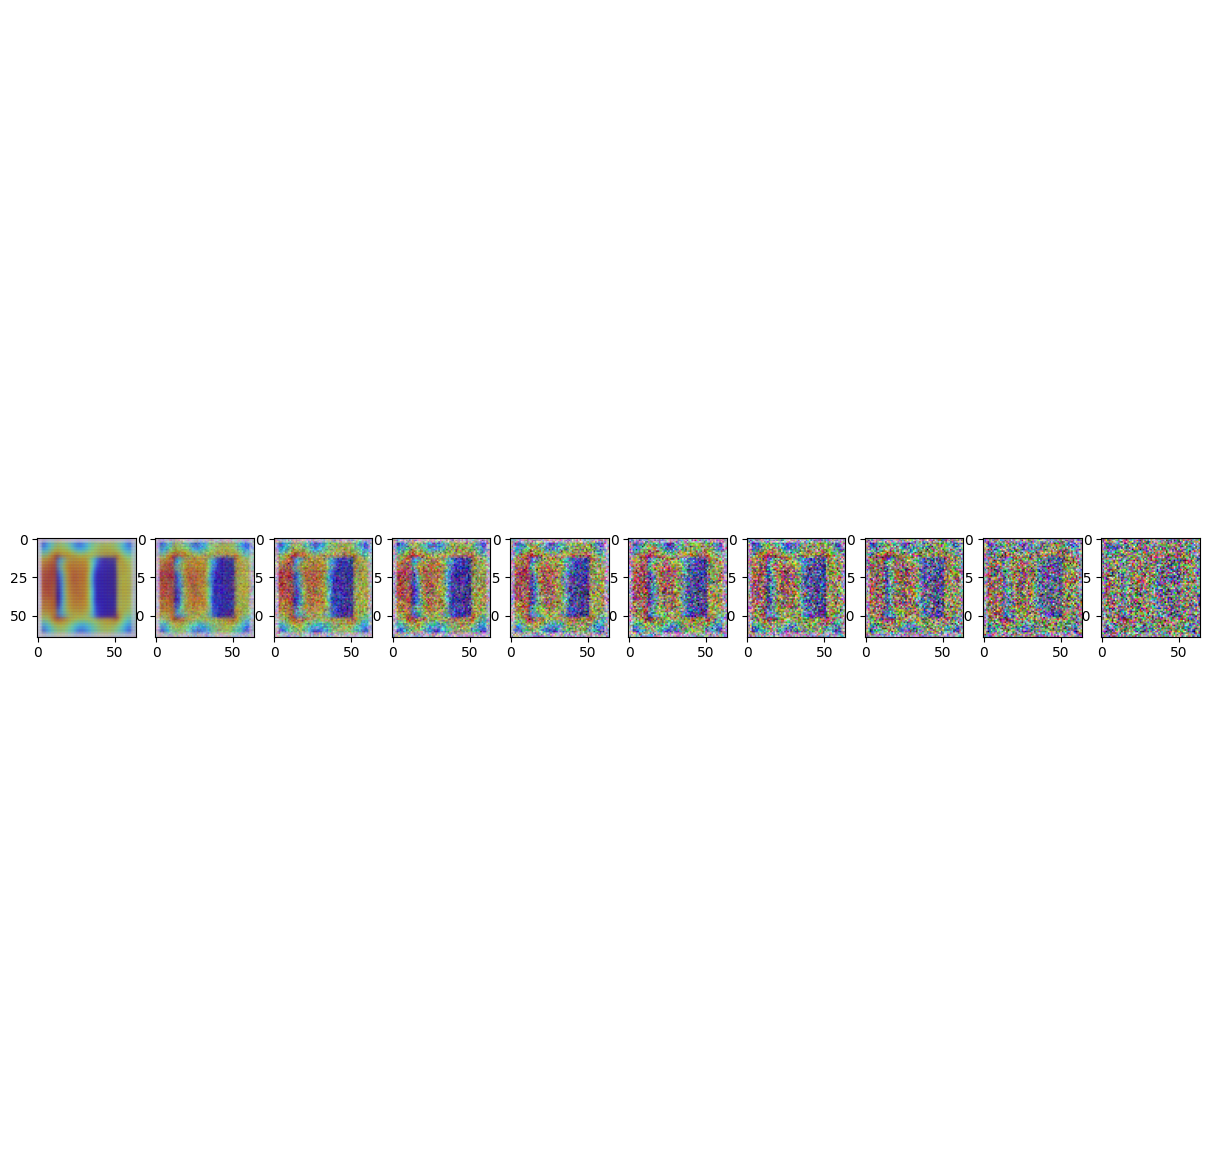

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

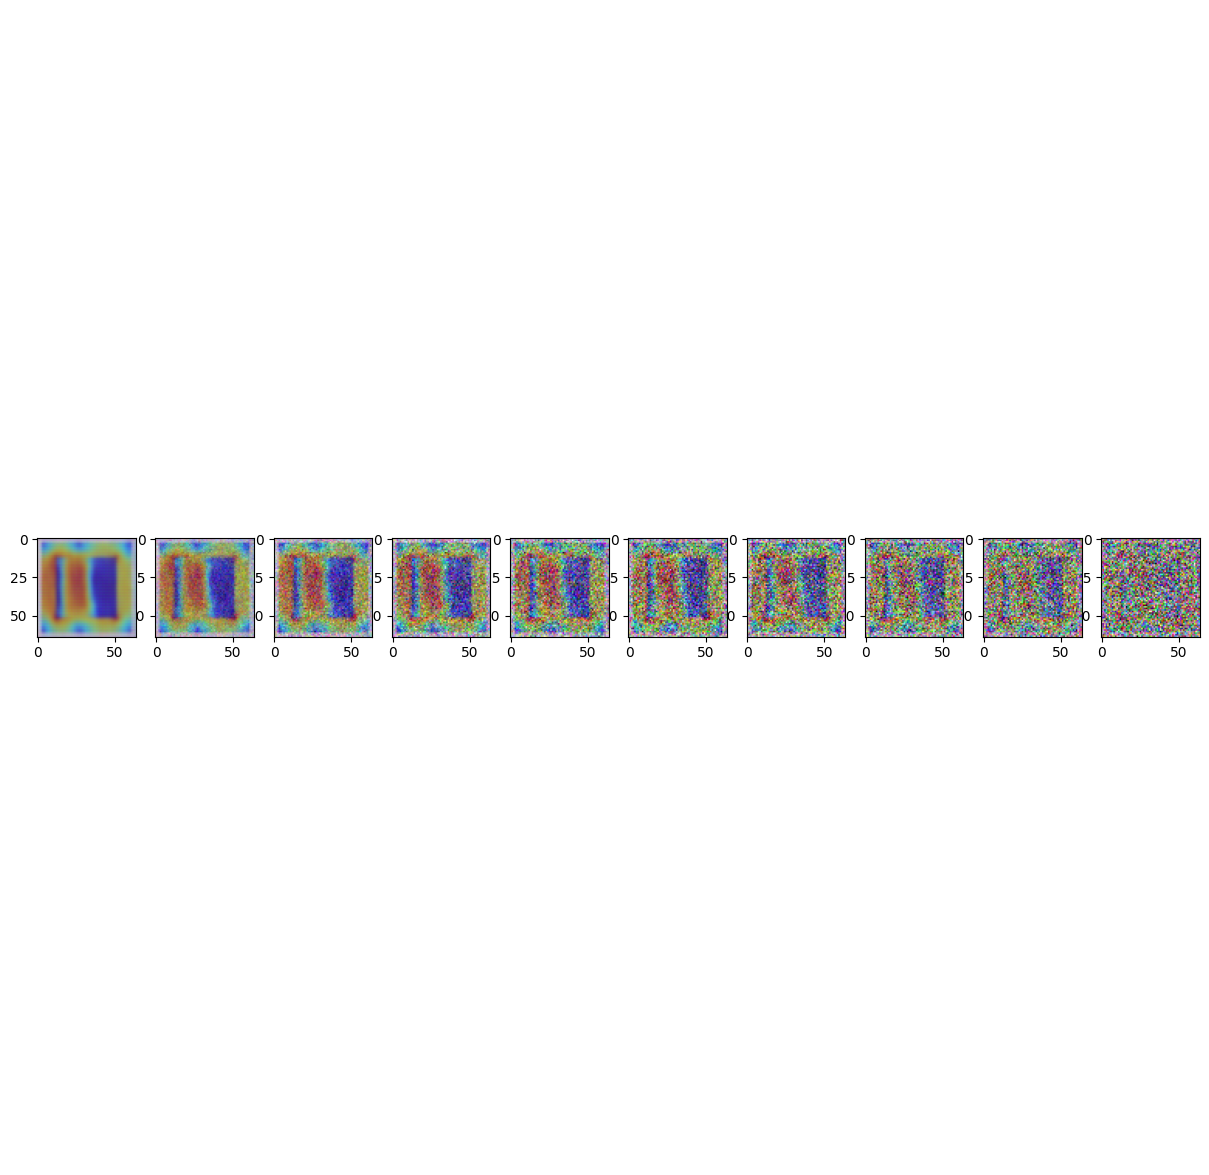

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

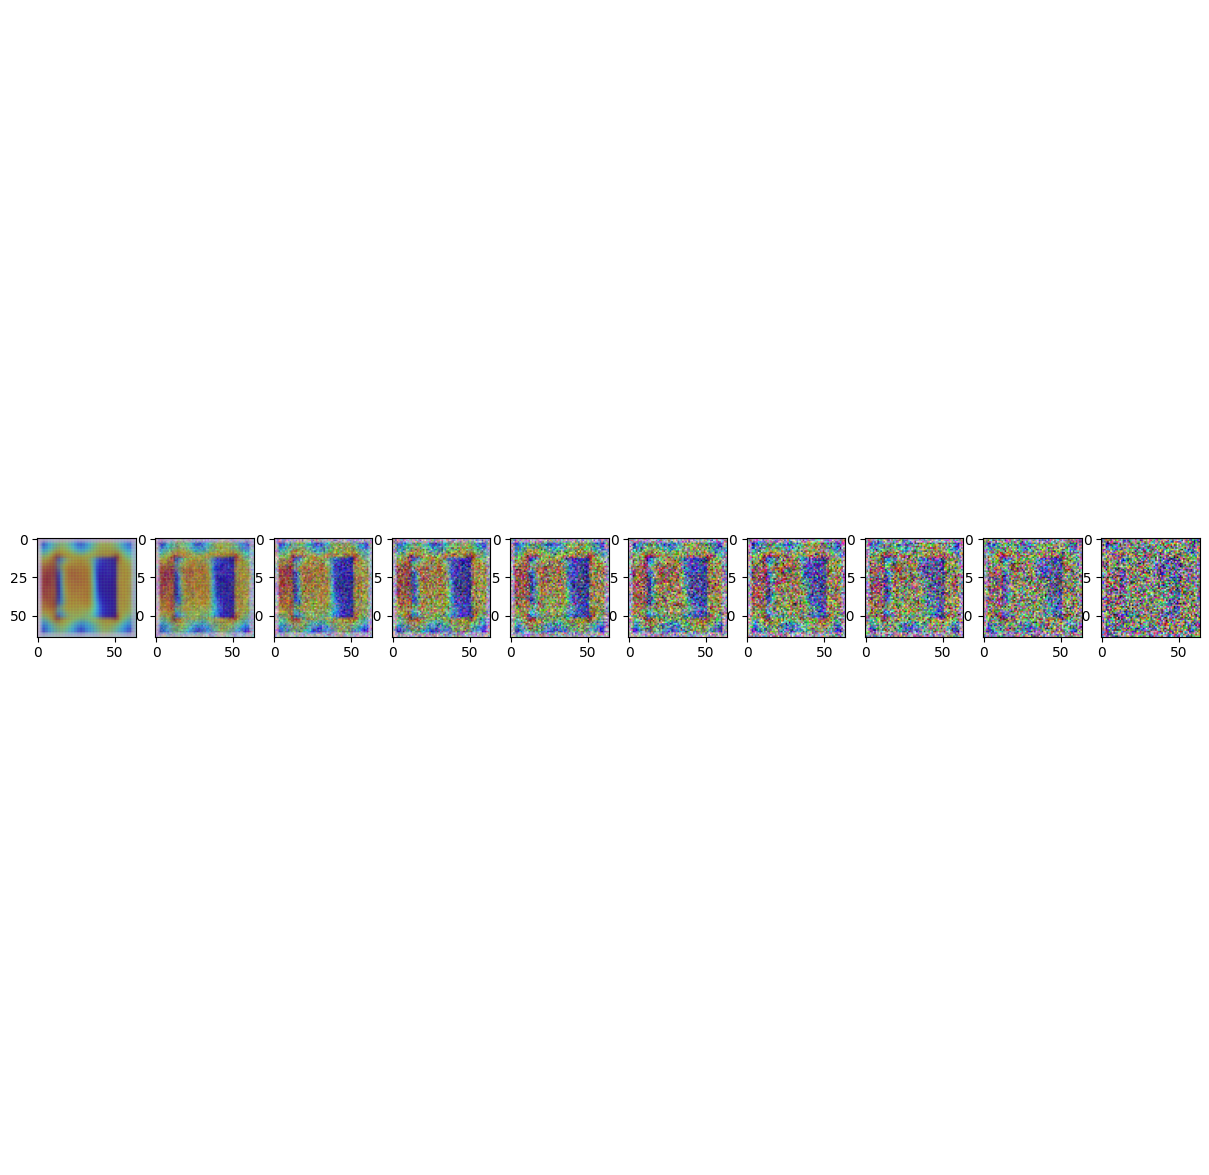

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

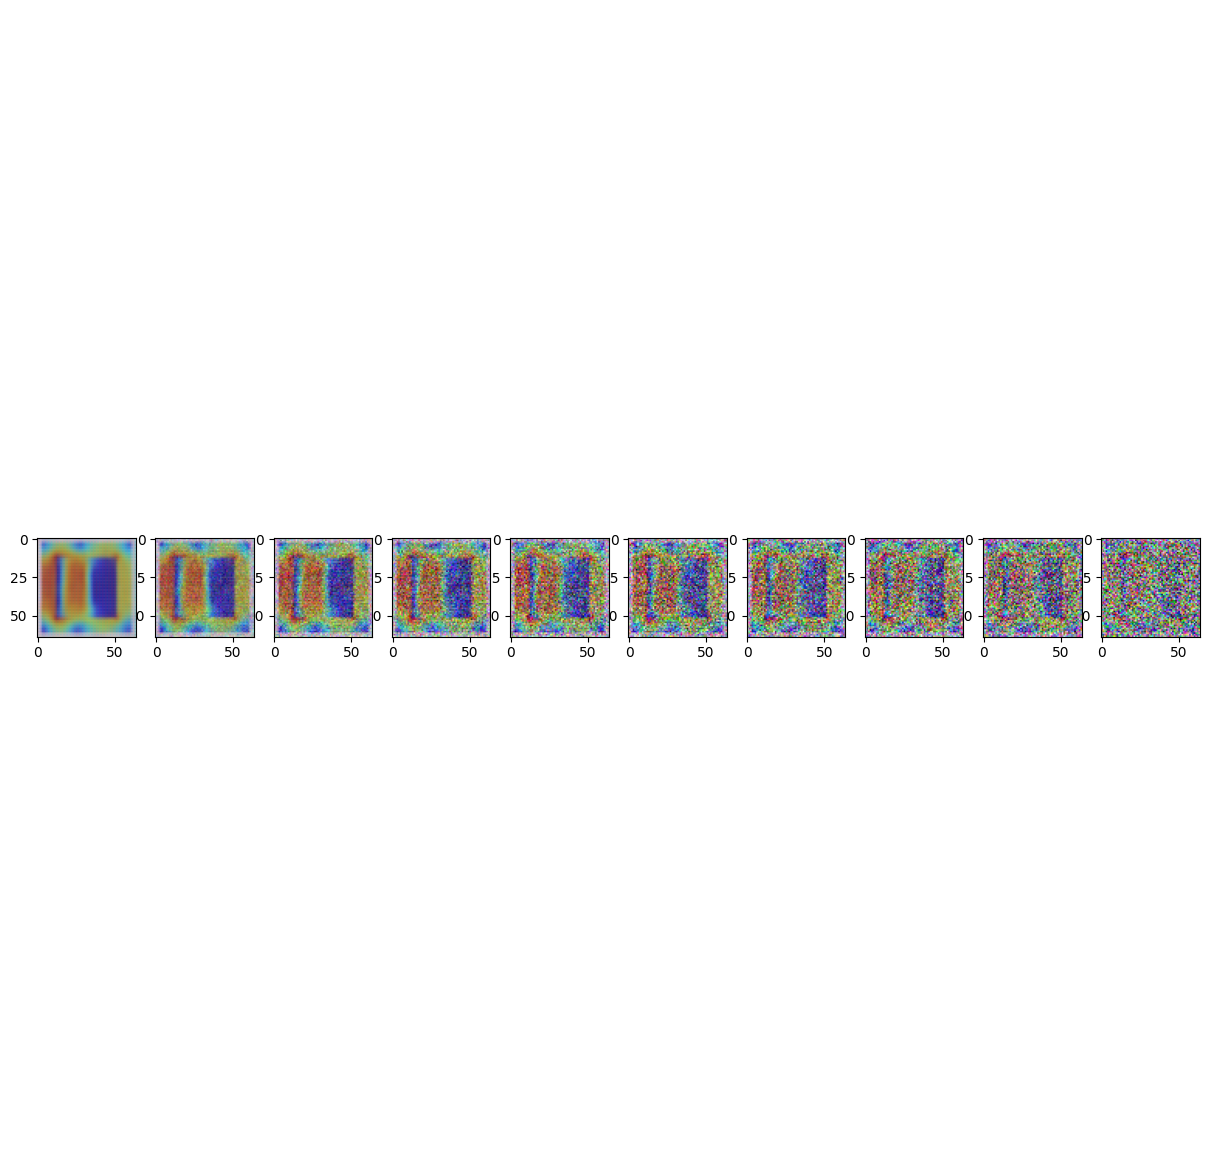

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

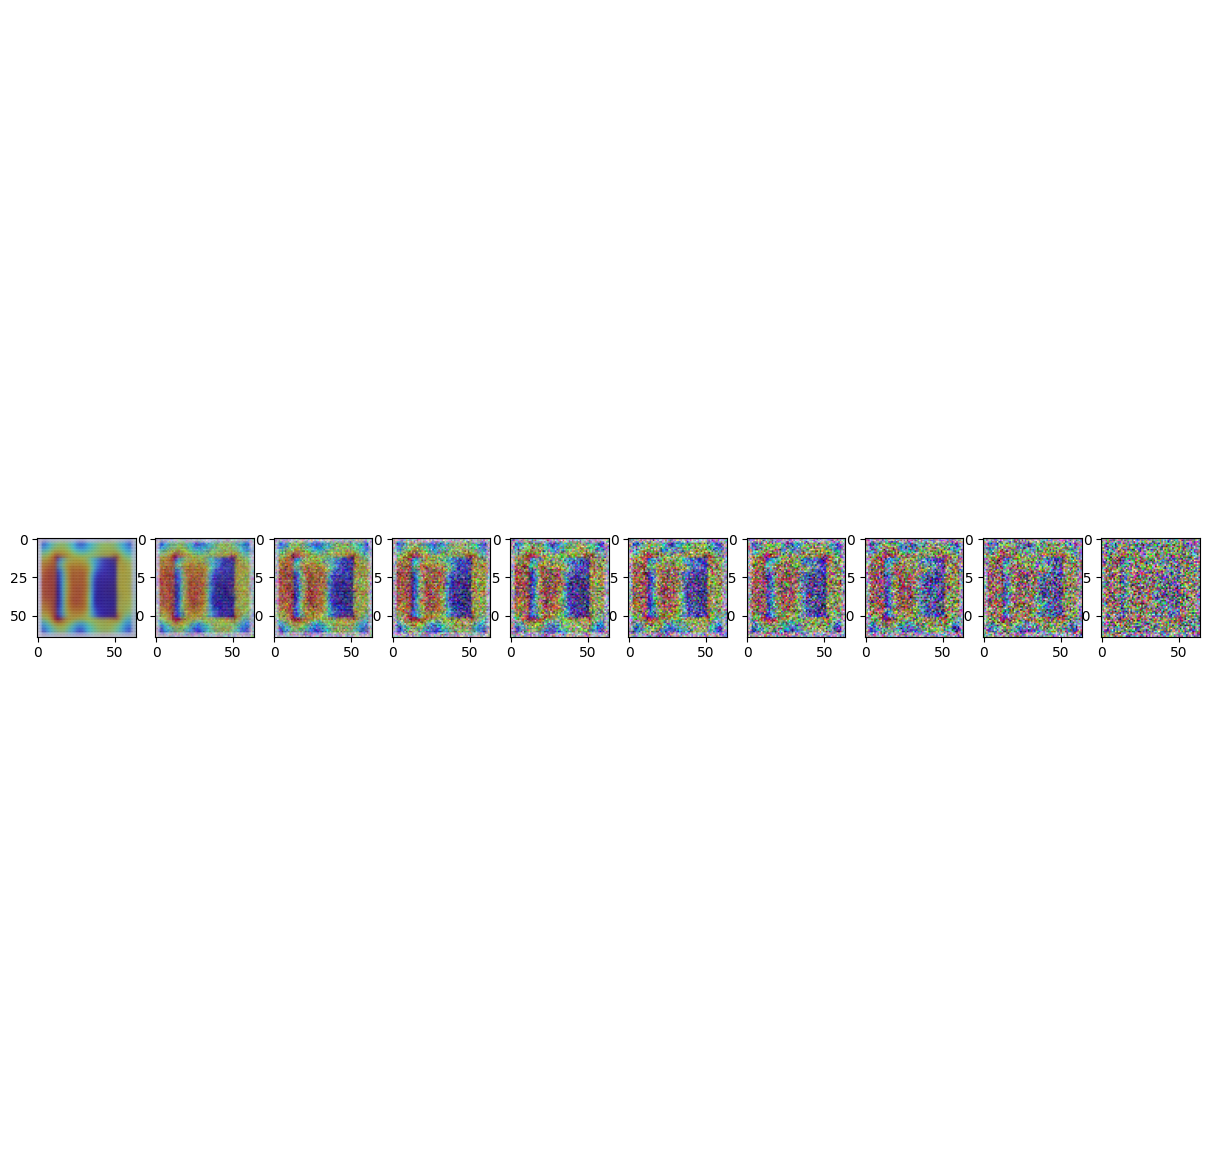

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

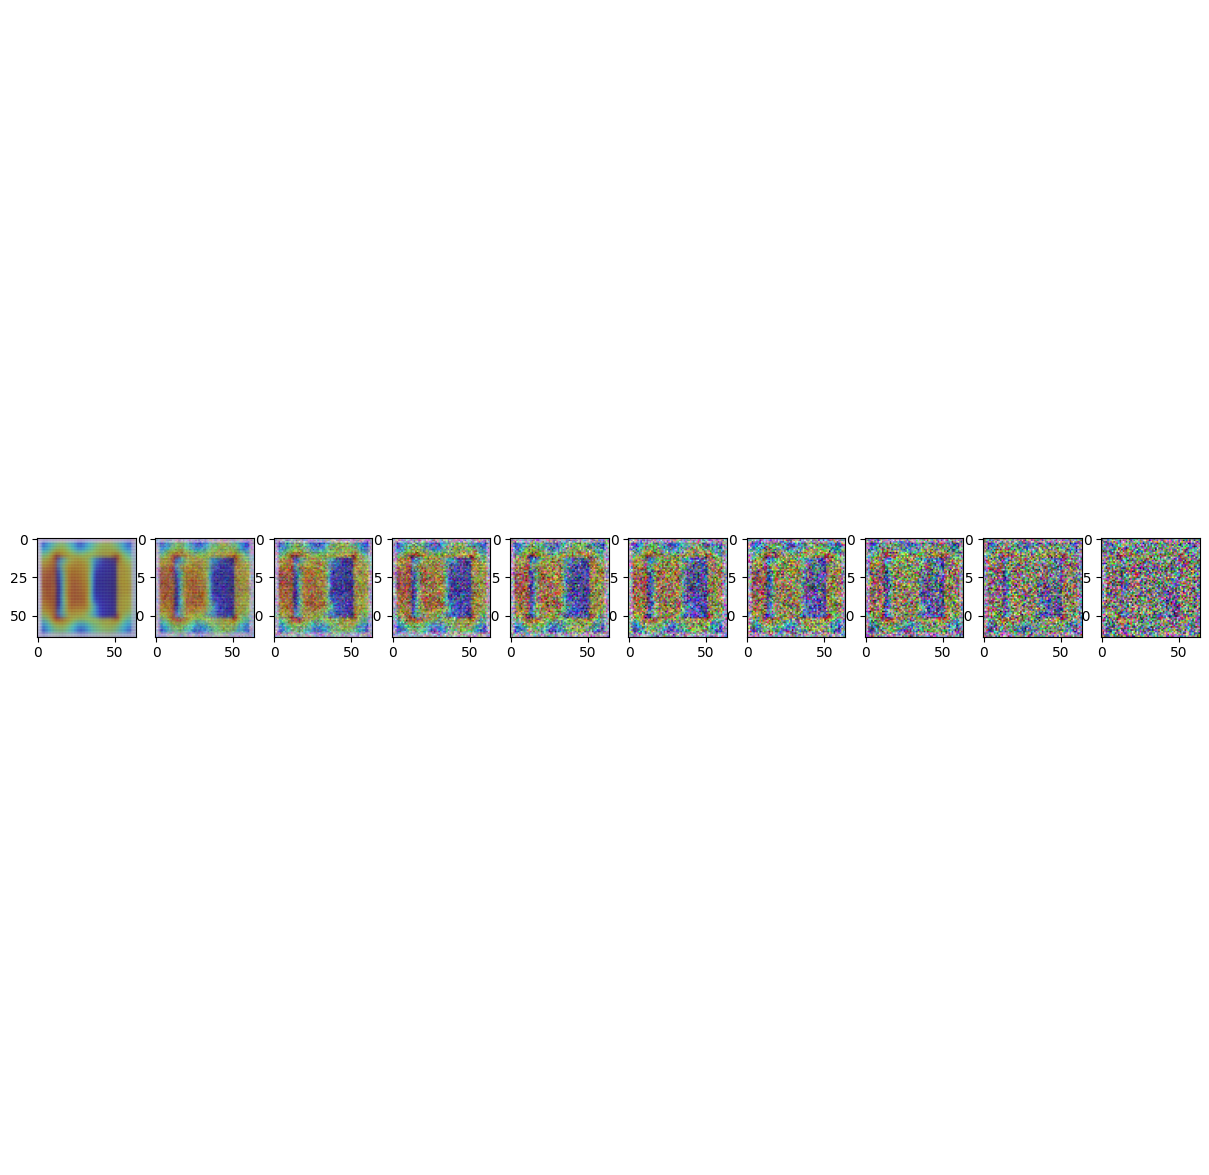

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

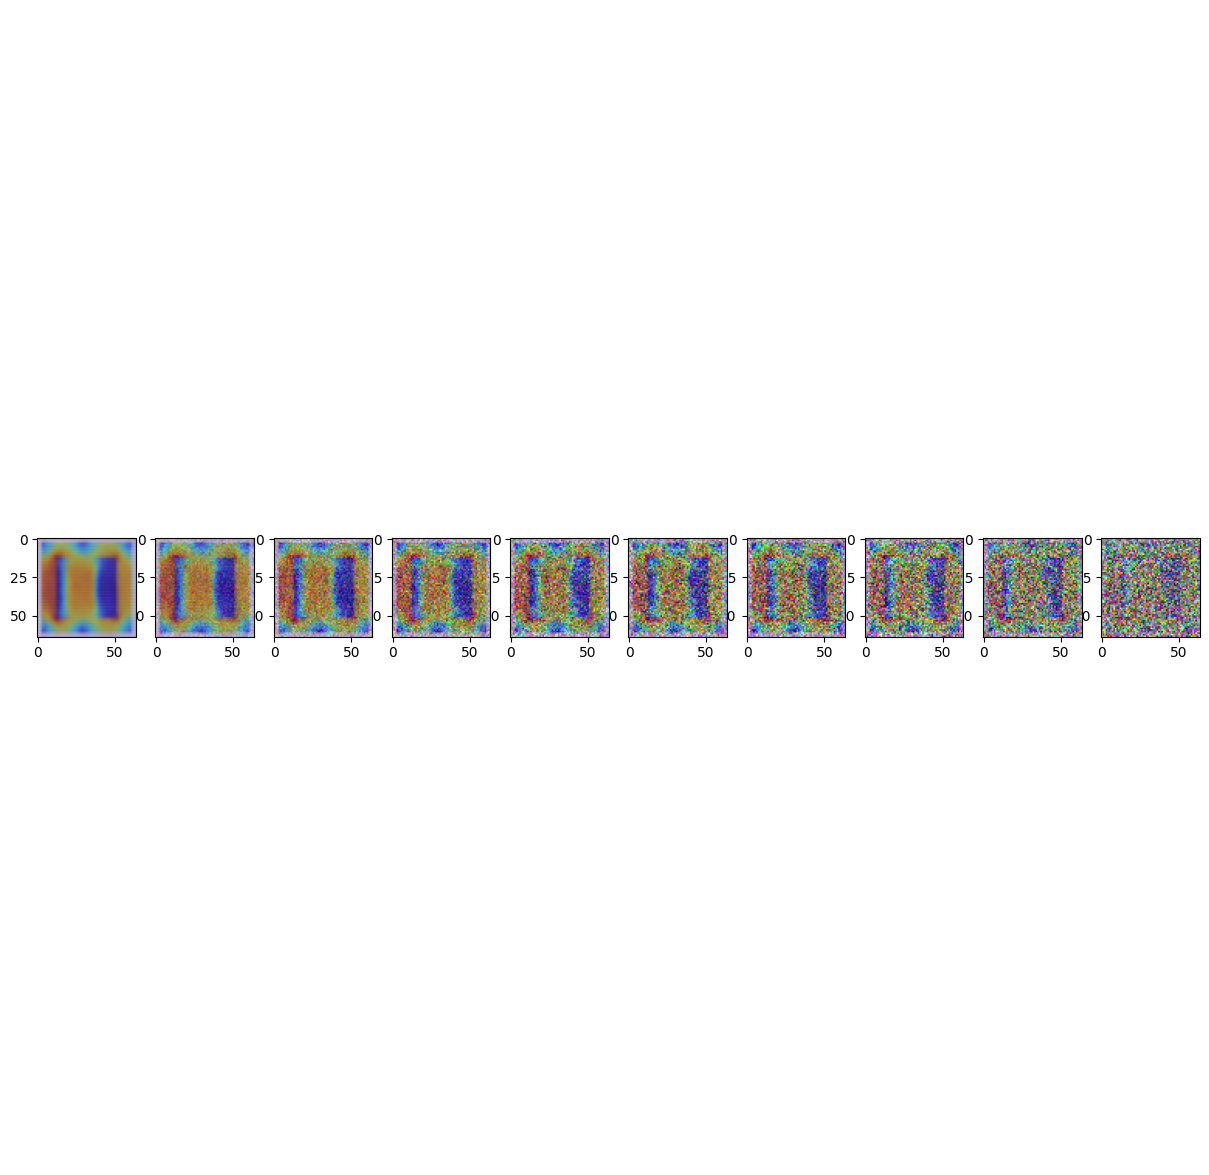

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

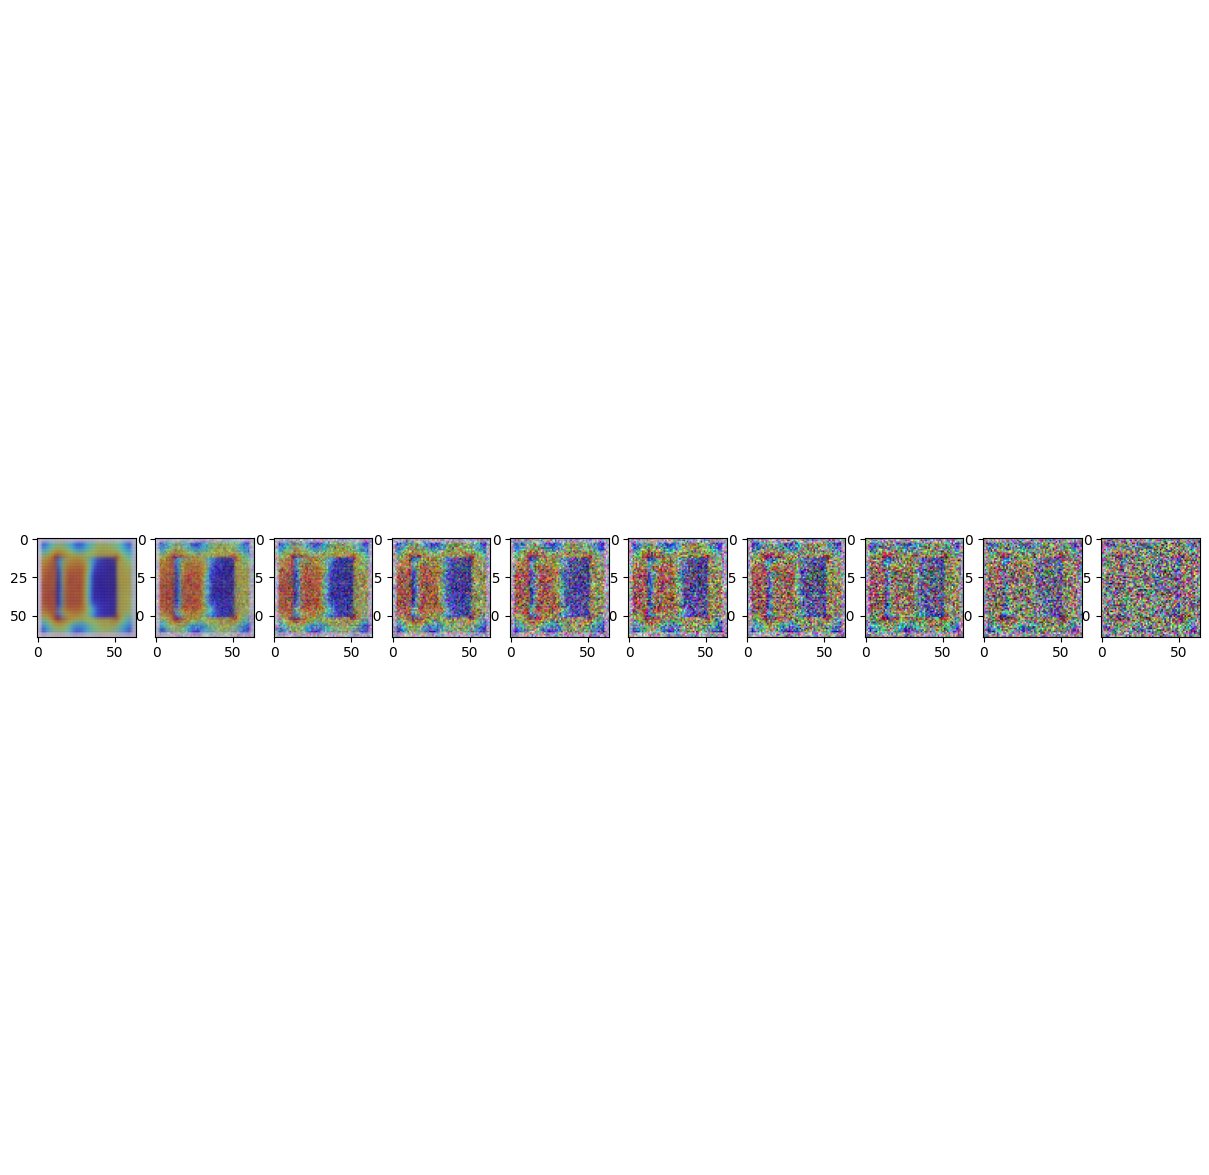

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

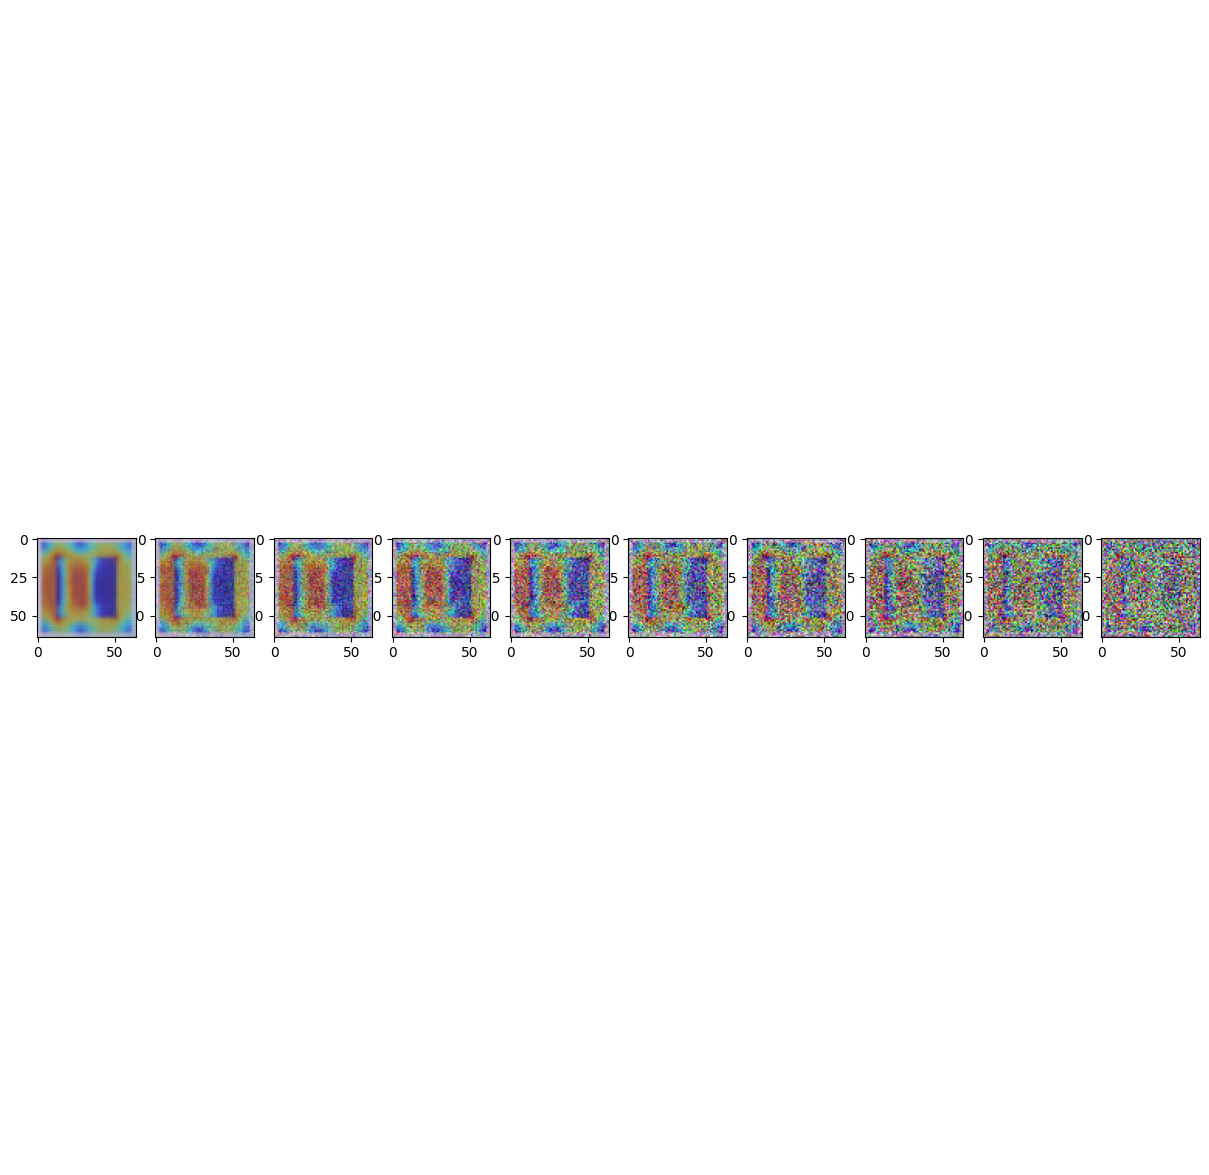

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

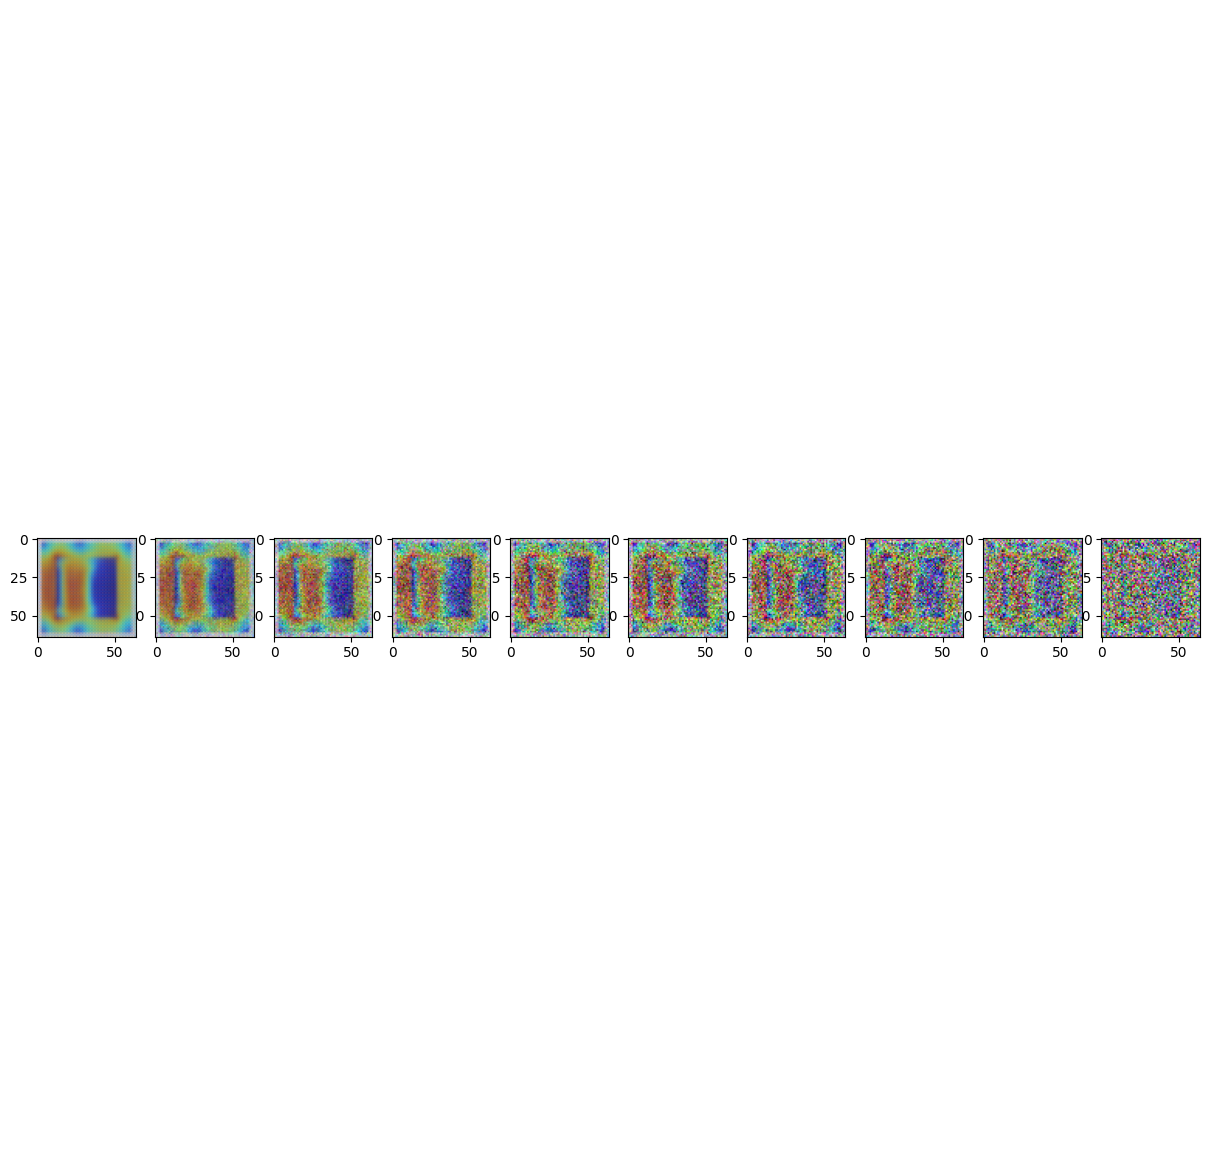

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

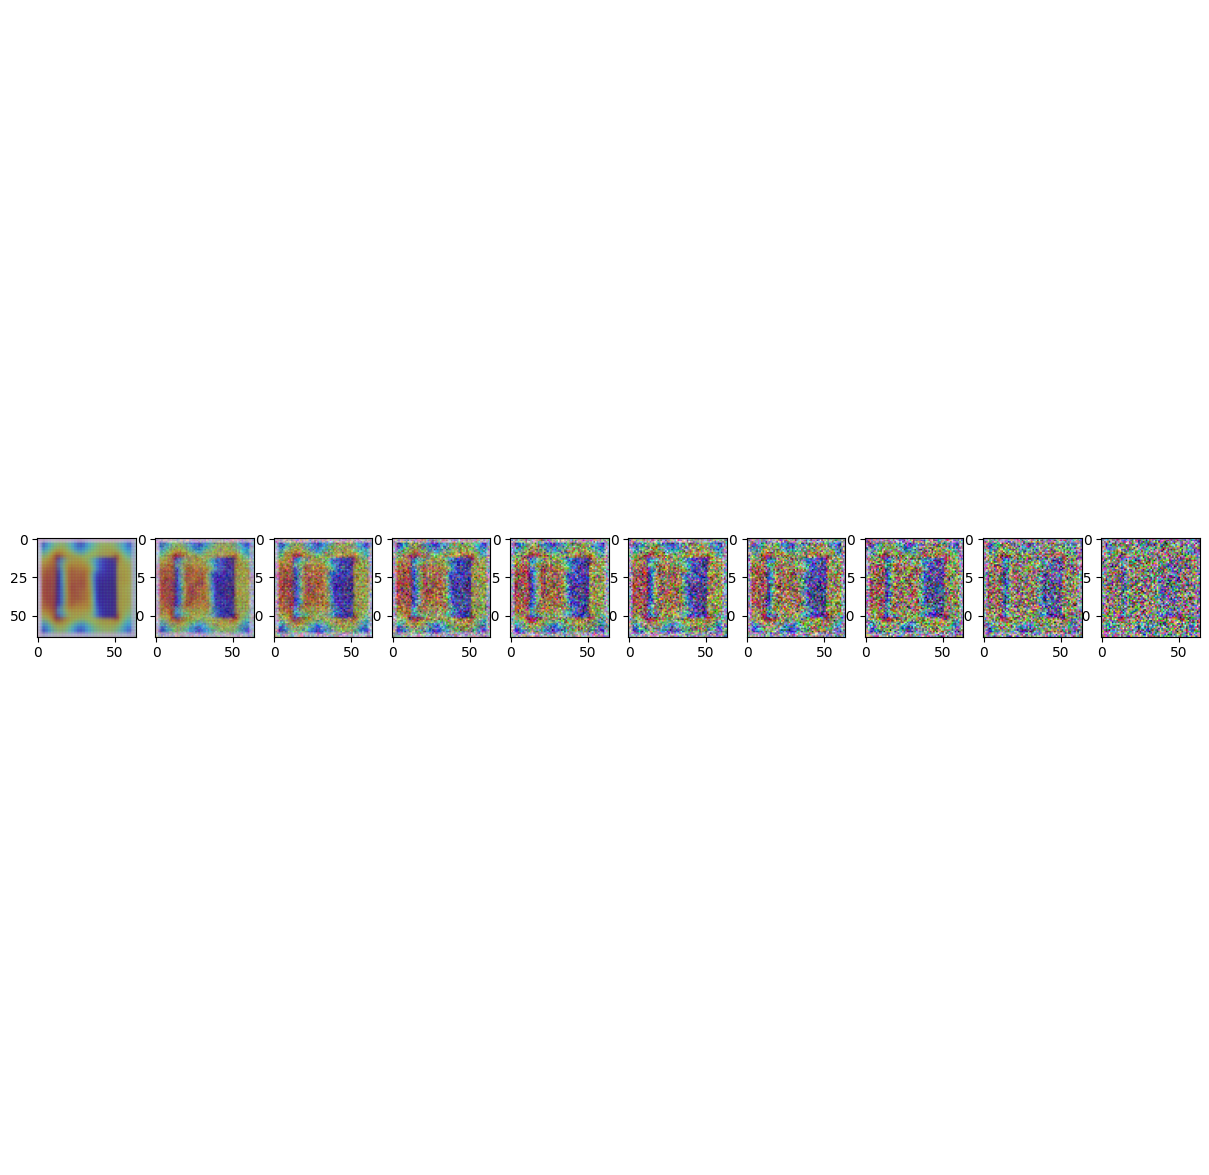

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

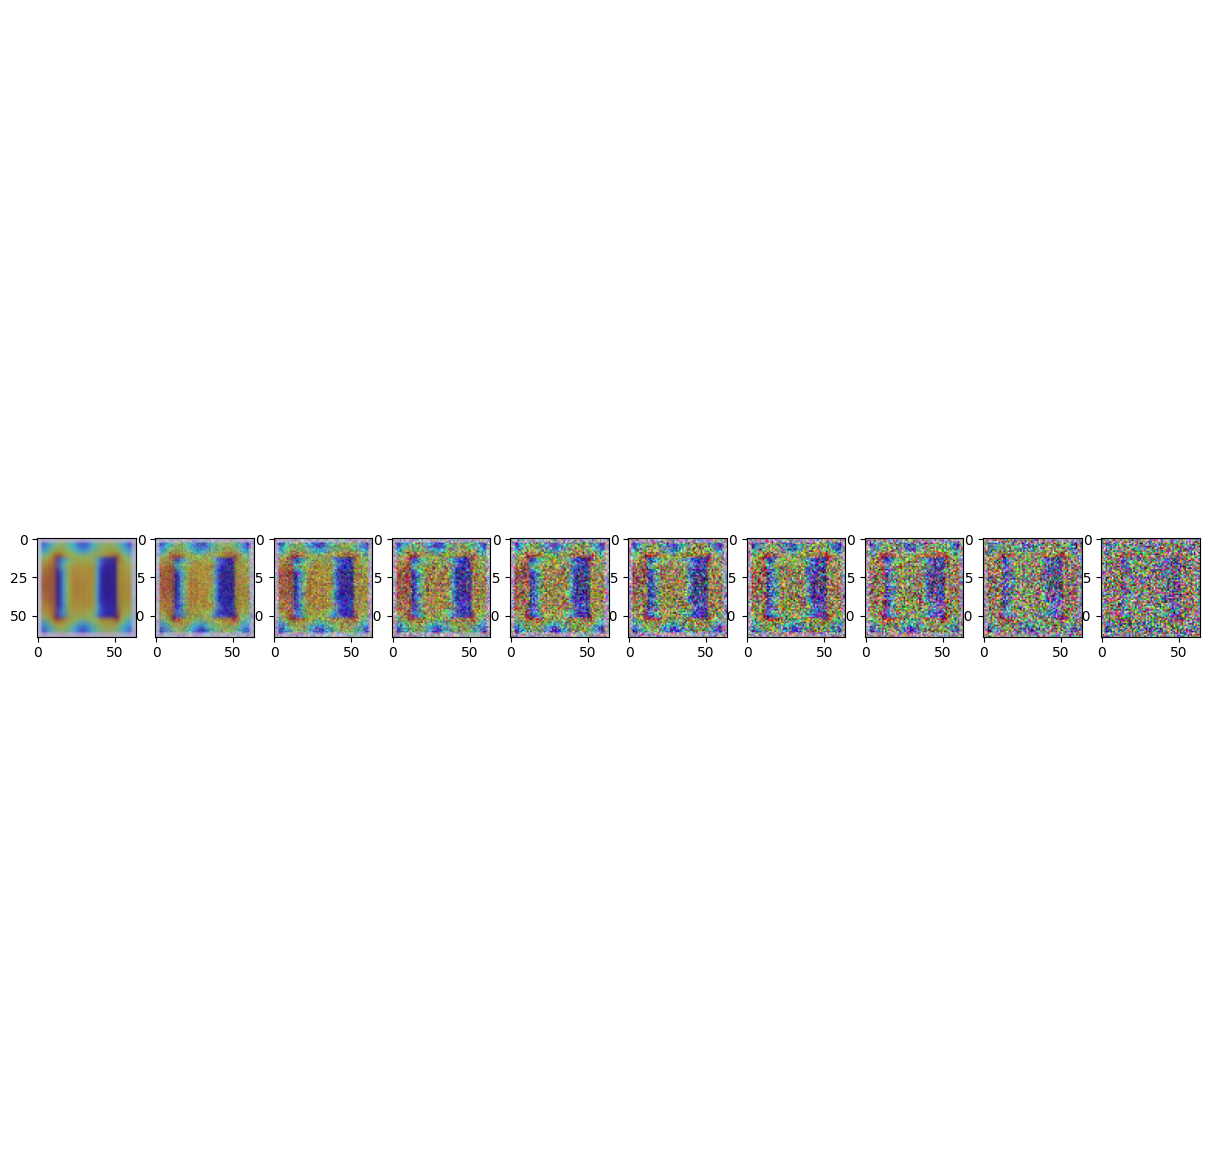

X shape: torch.Size([64, 3, 64, 64])
Batch: 1
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 2
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 3
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 4
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 5
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 6
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 7
Noise shape: torch.Size([64, 3, 64, 64])
Noise_pred shape: torch.Size([64, 3, 64, 64])
X shape: torch.Size([64, 3, 64, 64])
Batch: 8
Noise shape: torch.Size

In [7]:
# Training the model
train_diffusion_model(model, magnetic_dataloader, epochs=100)

In [8]:
torch.save(model.state_dict(), "diffusion_model_64.pth")